### Motivación

<p style='text-align: justify;'> La Dinámica de Fluidos Computacionales (CFD por sus siglas en inglés) es una herramienta numérica y computacional que busca describir el comportamiento de los fluidos por medio del campo de velocidad y de presión. Para esto, el método numérico debe resolver las ecuaciones de conservación de momento, también conocidas como Navier-Stokes, y las ecaución de conservación de la masa. Estas ecauciones describen varios fenómenos de gran importancia para la academia y para la industria. Sin embargo, el sistema de ecuaciones de conservación de momento es no-linear y puede exhibir un comportamiento caótico, conocido como turbulencia. Estas características dificultan el trabajo de encontrar una solución analítica (hasta ahora no se ha encontrado), y por tanto, se hace indispensable el uso de los métodos numéricos para fenómenos fluido-dinámicos o CFD tanto en la academia como en la industria.  </p>

<p style='text-align: justify;'>  En la actualidad existen un sin número de software comerciales que permiten resolver este sistema de ecuaciones, tales como Ansys y openFOAM. Adicionalmente, estas herramientas ofrecen post-procesamientos, cuyo objetivo es representar los datos de una manera gráfica para su futura interpretación. Sin embargo, estos programas se pueden convertir en una caja negra si el usuario no entiende el fundamento de los métodos numéricos, de la programación, y de las modelos matemáticas que describen el fenómeno. Esta sitaución que es muy común en diversos ambientes, es contraproducente, y hasta riesgosa, ya que no se tienen los conocimientos suficientes para interpretar y juzgar con criticidad los resultados del software, o en otras palabras, no está la capacidad para decidir si los resultados son coherentes o para sacar el máximo provecho de ellos.</p>

<p style='text-align: justify;'>  Esta práctica de profundización se originó por el deseo de usar plantear y usar correctamente simulaciones CFD. Para lograr esto, la práctica se enfoca en tres funamentos: primero, en aprender los modelos matemáticos que describen los fenómenos fluido-dinámicos; segundo, en aplicar correctamente el método de diferencia finitas (FDM) en la resolución de dichos modelos; y tercero, implementar técnicas de programación que permitan el desarrollo eficiente y ordenado de códigos CFD. </p>

El informe está estructurado de la siguiente manera:

1. <b>Modelación matemática</b>
    1. Caso de estudio
    1. Ecuaciones gobernantes
1. <b>Métodos de discretización con diferencias finitas</b>
    1. Esquema para el término advectivo
    1. Esquema para el término difusivo
    1. Esquema para la presión
    1. Discretización de Navier-Stokes
    1. Discretización de la ecuación de presión de Poisson (PPE)
    1. Discretización fractional step
1. <b>Implementación </b>
1. <b>Post-proceso</b>

### Modelación matemática

En este capítulo se presenta el caso de estudio, junto con sus condiciones iniciales y de contorno. Adicionalmente, se plantean las ecuaciones que describen dicho fenómeno teniendo en cuenta flujo incompresible.

#### Caso de estudio

<p style='text-align: justify;'> Se estudiará la Cavidad con tapa movible (o Lid-driven Cavity). Este caso se compone de una caja llena de algún fluido inicialmente en reposo. En un instante de tiempo, una de las paredes de la caja (la tapa) se comienza a mover indefinidamente a velocidad constante. Este movimiento genera vórtices o remolinos y gradientes de presión al interior de la caja. Debido a la condición de no deslizamiento, las componentes de la velocidad $u$ y $v$ son cero en las paredes; pero en la tapa la componente $u$ adquiere su misma velocidad. </p>

<img src=https://raw.githubusercontent.com/juhincapiem/CFD_codigos/master/FDM/informe/caso.png.jpg alt="Alternative text" width="400" />


<b>Condiciones de frontera en la Pared 1 o tapa:</b>
- u = velocidad de la tapa
- v = 0 m/s
- $\frac{\delta P}{\delta y}=0$

<b>Condiciones de frontera en la Pared 2:</b>
- u = 0 m/s
- v = 0 m/s
- $\frac{\delta P}{\delta x}=0$

<b>Condiciones de frontera en la Pared 3:</b>
- u = 0 m/s
- v = 0 m/s
- $\frac{\delta P}{\delta y}=0$

<b>Condiciones de frontera en la Pared 4:</b>
- u = 0 m/s
- v = 0 m/s
- $\frac{\delta P}{\delta x}=0$

#### Ecuaciones gobernantes

<p style='text-align: justify;'> El sistema de ecuaciones de conservación de momento (ecuación \ref{NS}) y la ecuación de continuidad (ecuación \ref{continuidad}) describen completamente la dinámica de los fluidos incompresibles. La ecuación \ref{NS} proviene de aplciar la segunda ley de Newton, es decir, haciendo igualando la derivada material con la sumatoria de fuerzas (presión y fuerzas cortantes). Por otro lado, la ecuación \ref{continuidad} es la forma diferencial de la conservación de la masa; pero asumiendo que la densidad del fluido permanece constante a lo largo del tiempo, en cualqueir punto del dominio. </p>

\begin{equation}
\frac{\delta \vec{V}}{\delta t}+\vec{V} \cdot \nabla \vec{V}=-\frac{1}{\rho} \cdot \nabla \cdot \vec{P}+ \nu \nabla^2 \vec{V}
\label{NS}
\end{equation}

\begin{equation}
\nabla \cdot \vec{V}=0
\label{continuidad}
\end{equation}

<p style='text-align: justify;'> La ecuación \ref{NS} contiene dentro de sí una serie de términos que expresan diferentes fenómenos físicos. Por ejemplo, el término $~\vec{V} \cdot \nabla \vec{V}~$ representa el transporte de alguna propiedad debido a un flujo. A este fenómeno se le llama transporte advectivo, y se caracetiza por tener derivadas de alguna propiedad (en este caso son las componentes de la velcodiad) multiplicadas por componentes de la velocidad. Tambén está el término $~\nu \nabla^2 \vec{V}~$, que representa el transporte de alguna propiedad debido a una diferencia de concetración o gradiente. A este fenómeno se le conoce como transporte difusivo, y se distingue por tener un laplaciano multiplicando a la propiedad de interés y a un coeficiente de difusión, en este caso son la velocidad y la viscosidad, respectivamente.</p>

### Métodos de discretización con diferencias finitas
<p style='text-align: justify;'> Como ya se mencionó, la ecuación \ref{NS} de Navier Stokes contiene fenómenos de transporte advectivos, difusivos y el término del gradiente de presión. Al intentar discretizar cada uno de estos términos, se debe escoger un esquema que esté en concordancia con la naturaleza del fenómeno. En los próximos capítulos se explica el esquema que se debe usar para cada término, junto con su forma explícita. </p>


#### Esquema para el término advectivo
<p style='text-align: justify;'> El término advectivo, ecuación \ref{advect}, expresa transporte de una propieda debido al flujo de algún fluido. Para discretizar correctamente este término, se recomienda el esquema <b>Backarward</b>, ya que este esquema toma información en la dirección en que se transporta la información </p>


\begin{equation}
\begin{aligned}
& \frac{\partial u}{\partial t}+u \frac{\partial u}{\partial x}+v \frac{\partial u}{\partial y}=0 \\
& \frac{\partial v}{\partial t}+u \frac{\partial v}{\partial x}+v \frac{\partial v}{\partial y}=0
\label{advect}
\end{aligned}
\end{equation}

La ecuación \ref{advect01} es la ecuación de transporte advectivo discretizada:

\begin{equation}
\begin{aligned}
& \frac{u_{i, j}^{n+1}-u_{i, j}^n}{\Delta t}+u_{i, j}^n \frac{u_{i, j}^n-u_{i-1, j}^n}{\Delta x}+v_{i, j}^n \frac{u_{i, j}^n-u_{i, j-1}^n}{\Delta y}=0 \\
& \frac{v_{i, j}^{n+1}-v_{i, j}^n}{\Delta t}+u_{i, j}^n \frac{v_{i, j}^n-v_{i-1, j}^n}{\Delta x}+v_{i, j}^n \frac{v_{i, j}^n-v_{i, j-1}^n}{\Delta y}=0
\label{advect01}
\end{aligned}
\end{equation}

La ecuación \ref{advect02} es la ecaución de transporte advectivo con el término del tiempo futuro despejada:

\begin{equation}
\begin{aligned}
u_{i, j}^{n+1} & =u_{i, j}^n-u_{i, j} \frac{\Delta t}{\Delta x}\left(u_{i, j}^n-u_{i-1, j}^n\right)-v_{i, j}^n \frac{\Delta t}{\Delta y}\left(u_{i, j}^n-u_{i, j-1}^n\right) \\
v_{i, j}^{n+1} & =v_{i, j}^n-u_{i, j} \frac{\Delta t}{\Delta x}\left(v_{i, j}^n-v_{i-1, j}^n\right)-v_{i, j}^n \frac{\Delta t}{\Delta y}\left(v_{i, j}^n-v_{i, j-1}^n\right)
\label{advect02}
\end{aligned}
\end{equation}


#### Esquema para el término difusivo

<p style='text-align: justify;'>  El término advectivo, ecuación \ref{advect}, expresa transporte de una propieda debido diferencias de concentración o gradientes. Para discretizar correctamente este término, se recomienda el esquema <b>Centradas</b>, ya este esquema toma información de las periferias en dirección del transporte difusico. </p>

\begin{equation}
\frac{\partial u}{\partial t}=\nu \frac{\partial^2 u}{\partial x^2}+\nu \frac{\partial^2 u}{\partial y^2}
\label{difus}
\end{equation}

La ecuación \ref{difus01} es la ecuación de transporte difusivo discretizada:

\begin{equation}
\frac{u_{i, j}^{n+1}-u_{i, j}^n}{\Delta t}=\nu \frac{u_{i+1, j}^n-2 u_{i, j}^n+u_{i-1, j}^n}{\Delta x^2}+\nu \frac{u_{i, j+1}^n-2 u_{i, j}^n+u_{i, j-1}^n}{\Delta y^2}
\label{difus01}
\end{equation}

La ecuación \ref{difus02} es la ecuación de transporte difusivo con el término del tiempo futuro despejada:

\begin{equation}
\begin{aligned}
u_{i, j}^{n+1}=u_{i, j}^n & +\frac{\nu \Delta t}{\Delta x^2}\left(u_{i+1, j}^n-2 u_{i, j}^n+u_{i-1, j}^n\right) \\
& +\frac{\nu \Delta t}{\Delta y^2}\left(u_{i, j+1}^n-2 u_{i, j}^n+u_{i, j-1}^n\right)
\label{difus02}
\end{aligned}
\end{equation}


#### Esquema para la presión


#### Discretización de Navier-Stokes
<p style='text-align: justify;'> Conociendo los esquemas de discretización para el término advectivo, difusivo y gradiente de presión, se puede discretizar por completo la ecuación \ref{NS}. La ecuación \ref{NS01} y \ref{NS02} son los componentes en X y en Y de Navier-Stokes discretizadas, respectivamente. </p>

\begin{equation}
\begin{aligned}
& \frac{u_{i, j}^{n+1}-u_{i, j}^n}{\Delta t}+u_{i, j}^n \frac{u_{i, j}^n-u_{i-1, j}^n}{\Delta x}+v_{i, j}^n \frac{u_{i, j}^n-u_{i, j-1}^n}{\Delta y}= \\
& \quad-\frac{1}{\rho} \frac{p_{i+1, j}^n-p_{i-1, j}^n}{2 \Delta x}+\nu\left(\frac{u_{i+1, j}^n-2 u_{i, j}^n+u_{i-1, j}^n}{\Delta x^2}+\frac{u_{i, j+1}^n-2 u_{i, j}^n+u_{i, j-1}^n}{\Delta y^2}\right)
\label{NS01}
\end{aligned}
\end{equation}

\begin{equation}
\begin{aligned}
& \frac{v_{i, j}^{n+1}-v_{i, j}^n}{\Delta t}+u_{i, j}^n \frac{v_{i, j}^n-v_{i-1, j}^n}{\Delta x}+v_{i, j}^n \frac{v_{i, j}^n-v_{i, j-1}^n}{\Delta y}= \\
& \quad-\frac{1}{\rho} \frac{p_{i, j+1}^n-p_{i, j-1}^n}{2 \Delta y}+\nu\left(\frac{v_{i+1, j}^n-2 v_{i, j}^n+v_{i-1, j}^n}{\Delta x^2}+\frac{v_{i, j+1}^n-2 v_{i, j}^n+v_{i, j-1}^n}{\Delta y^2}\right)
\label{NS02}
\end{aligned}
\end{equation}

La ecuación \ref{NS03} es la discretización del componente en X:

\begin{equation}
\begin{aligned}
u_{i, j}^{n+1}=u_{i, j}^n & -u_{i, j}^n \frac{\Delta t}{\Delta x}\left(u_{i, j}^n-u_{i-1, j}^n\right)-v_{i, j}^n \frac{\Delta t}{\Delta y}\left(u_{i, j}^n-u_{i, j-1}^n\right) \\
& -\frac{\Delta t}{\rho 2 \Delta x}\left(p_{i+1, j}^n-p_{i-1, j}^n\right) \\
& +\nu\left(\frac{\Delta t}{\Delta x^2}\left(u_{i+1, j}^n-2 u_{i, j}^n+u_{i-1, j}^n\right)+\frac{\Delta t}{\Delta y^2}\left(u_{i, j+1}^n-2 u_{i, j}^n+u_{i, j-1}^n\right)\right)
\label{NS03}
\end{aligned}
\end{equation}

La ecuación \ref{NS04} es la discretización del componente en Y:

\begin{equation}
\begin{aligned}
v_{i, j}^{n+1}=v_{i, j}^n & \left.-u_{i, j}^n \frac{\Delta t}{\Delta x}\left(v_{i, j}^n-v_{i-1, j}^n\right)-v_{i, j}^n \frac{\Delta t}{\Delta y}\left(v_{i, j}^n-v_{i, j-1}^n\right)\right) \\
& -\frac{\Delta t}{\rho 2 \Delta y}\left(p_{i, j+1}^n-p_{i, j-1}^n\right) \\
& +\nu\left(\frac{\Delta t}{\Delta x^2}\left(v_{i+1, j}^n-2 v_{i, j}^n+v_{i-1, j}^n\right)+\frac{\Delta t}{\Delta y^2}\left(v_{i, j+1}^n-2 v_{i, j}^n+v_{i, j-1}^n\right)\right)
\label{NS04}
\end{aligned}
\end{equation}


#### Discretización de la ecuación de presión de Poisson (PPE)
<p style='text-align: justify;'>  Para flujo compresible, la velocidad y la presión se peuden acoplar con la ecuación de Estado. Sin embargo, para flujo incompreisble no hay una manera obvia para acoplar estas dos cantidades. Para esto, se debe tomar la divergencia de la conservación de momento:<p>

$$\begin{aligned}\nabla \cdot \mathbf{M}=\frac{\partial}{\partial x} M_x+\frac{\partial}{\partial y} M_y \end{aligned}$$
    
$$\begin{aligned}\frac{\partial}{\partial x} M_x=\frac{\partial}{\partial x} \frac{\partial u}{\partial t}+\frac{\partial u}{\partial x} \frac{\partial u}{\partial x}+u \frac{\partial^2 u}{\partial x^2}+\frac{\partial v}{\partial x} \frac{\partial u}{\partial y}+v \frac{\partial^2 u}{\partial x \partial y}=-\frac{1}{\rho} \frac{\partial^2 p}{\partial x^2}+\nu\left(\frac{\partial^3 u}{\partial x^3}+\frac{\partial^3 u}{\partial x \partial y^2}\right) \\ \frac{\partial}{\partial y} M_y=\frac{\partial}{\partial y} \frac{\partial v}{\partial t}+\frac{\partial u}{\partial y} \frac{\partial v}{\partial x}+u \frac{\partial^2 v}{\partial x \partial y}+\frac{\partial v}{\partial y} \frac{\partial v}{\partial y}+v \frac{\partial^2 y}{\partial y^2}=-\frac{1}{\rho} \frac{\partial^2 p}{\partial y^2}+\nu\left(\frac{\partial^3 v}{\partial x^2 \partial y}+\frac{\partial^3 v}{\partial y^3}\right)\end{aligned}$$

Por comodidad se separa los dos lados de la igualdad, el izquierdo (LHS) y el derecho (RHS):

\begin{aligned} 
& \frac{\partial}{\partial x} M_x+\frac{\partial}{\partial y} M_y= \\ & \frac{\partial}{\partial t}\left(\frac{\partial u}{\partial x}+\frac{\partial v}{\partial y}\right)+\left(\frac{\partial u}{\partial x}\right)^2+\frac{\partial u}{\partial y} \frac{\partial v}{\partial x}+u \frac{\partial^2 u}{\partial x^2}+u \frac{\partial^2 v}{\partial x \partial y}+\frac{\partial v}{\partial x} \frac{\partial u}{\partial y}+\left(\frac{\partial v}{\partial y}\right)^2+v \frac{\partial^2 u}{\partial x \partial y}+v \frac{\partial^2 v}{\partial y^2}=R H S 
\end{aligned}

Se arregla la expresión agrupando la divergencia de la velocidad (ecuación de continuidad):

\begin{aligned}
& \frac{\partial}{\partial x} M_x+\frac{\partial}{\partial y} M_y= \\
& \frac{\partial}{\partial t}\left(\frac{\partial u}{\partial x}+\frac{\partial v}{\partial y}\right)+\left(\frac{\partial u}{\partial x}\right)^2+2 \frac{\partial u}{\partial y} \frac{\partial v}{\partial x}+u \frac{\partial}{\partial x}\left(\frac{\partial u}{\partial x}+\frac{\partial v}{\partial y}\right)+\left(\frac{\partial v}{\partial y}\right)^2+v \frac{\partial}{\partial y}\left(\frac{\partial u}{\partial x}+\frac{\partial v}{\partial y}\right)=R H S
\end{aligned}

Se reemplaza la ecuación de continuidad $\nabla \cdot V = 0$:

$$\frac{\partial}{\partial x} M_x+\frac{\partial}{\partial y} M_y=\left(\frac{\partial u}{\partial x}\right)^2+2 \frac{\partial u}{\partial y} \frac{\partial v}{\partial x}+\left(\frac{\partial v}{\partial y}\right)^2=R H S$$

Se aplica el mismo procedimiento para el lado izquierdo (LHS):

$$-\frac{1}{\rho}\left(\frac{\partial^2 p}{\partial x^2}+\frac{\partial^2 p}{\partial y^2}\right)+\nu\left(\frac{\partial^3 u}{\partial x^3}+\frac{\partial^3 u}{\partial x \partial y^2}+\frac{\partial^3 v}{\partial x^2 \partial y}+\frac{\partial^3 v}{\partial y^3}\right)=L H S$$

Se agrupan términos:

$$-\frac{1}{\rho}\left(\frac{\partial^2 p}{\partial x^2}+\frac{\partial^2 p}{\partial y^2}\right)+\nu\left(\frac{\partial^2}{\partial x^2}\left(\frac{\partial u}{\partial x}+\frac{\partial v}{\partial y}\right)+\frac{\partial^2}{\partial y^2}\left(\frac{\partial u}{\partial x}+\frac{\partial v}{\partial y}\right)\right)=L H S$$

Se reemplaza la ecuación de continuidad $\nabla \cdot V = 0$:

$$-\frac{1}{\rho}\left(\frac{\partial^2 p}{\partial x^2}+\frac{\partial^2 p}{\partial y^2}\right)=L H S$$

Se iguala el lado derecho con el lado izquierdo:

\begin{equation}
-\frac{1}{\rho}\left(\frac{\partial^2 p}{\partial x^2}+\frac{\partial^2 p}{\partial y^2}\right)=\left(\frac{\partial u}{\partial x}\right)^2+2 \frac{\partial u}{\partial y} \frac{\partial v}{\partial x}+\left(\frac{\partial v}{\partial y}\right)^2
\label{PPE}
\end{equation}

Si se discretiza la ecuación \ref{PPE} usando esquema centrado tanto para las derivadas de la velocidad como para el gradiente de la presión se obtienes lo siguiente:

\begin{equation}
\begin{aligned}
& \frac{p_{i+1, j}^n-2 p_{i, j}^n+p_{i-1, j}^n}{\Delta x^2}+\frac{p_{i, j+1}^n-2 p_{i, j}^n+p_{i, j-1}^n}{\Delta y^2}= \\
& \rho\left[-\frac{u_{i+1, j}-u_{i-1, j}}{2 \Delta x} \frac{u_{i+1, j}-u_{i-1, j}}{2 \Delta x}-2 \frac{u_{i, j+1}-u_{i, j-1}}{2 \Delta y} \frac{v_{i+1, j}-v_{i-1, j}}{2 \Delta x}-\frac{v_{i, j+1}-v_{i, j-1}}{2 \Delta y} \frac{v_{i, j+1}-v_{i, j-1}}{2 \Delta y}\right] \\
&
\label{PPEmal}
\end{aligned}
\end{equation}

<p style='text-align: justify;'>  En el mundo de lo continuo, la ecuación \ref{continuidad} se puede aplicar en cualqueir momento, y se debe cumplir; pero no necesariamente esto sucederá en el mundo de los discreto. Es decir, cuando se discretiza, la ecuación de continuidad no se cumple, no porque haya perdido validez, sino por lo errores numéricos originados por el truncamiento y el redondeo. Por lo tanto, la ecuación \ref{PPEmal} no es apropiada para la solución del caso. </p>

#### Discretización fractional step

A continuación se presenta una solución a este problema. Primero se expresa la ecuación \ref{NS} en forma vectorial:

$$\frac{\partial \mathbf{u}}{\partial t}+\mathbf{u} \cdot \nabla \mathbf{u}=-\frac{1}{\rho} \nabla p+\nu \nabla^2 \mathbf{u}$$

Luego se discretiza y se despeja la velocidad del tiempo futuro:

$$\mathbf{u}^{n+1}=\mathbf{u}^n+\Delta t\left(-\mathbf{u}^n \cdot \nabla \mathbf{u}^n-\frac{1}{\rho} \nabla p^{n+1}+\nu \nabla^2 \mathbf{u}^n\right)$$

Se aplica la divergencia:

$$\nabla \cdot \mathbf{u}^{n+1}=\nabla \cdot \mathbf{u}^n+\Delta t\left(-\nabla \cdot\left(\mathbf{u}^n \cdot \nabla \mathbf{u}^n\right)-\frac{1}{\rho} \nabla^2 p^{n+1}+\nu \nabla^2\left(\nabla \cdot \mathbf{u}^n\right)\right)$$

Se despeja el término de la presión. Se le pone el super índice $n+1$ porque es la presión del tiempo futuro, que asegura que la ecuación de continuidad para el tiempo $n+1$ se cumpla:

$$\nabla^2 p^{n+1}=\rho \frac{\nabla \cdot \mathbf{u}^n}{\Delta t}-\rho \nabla \cdot\left(\mathbf{u}^n \cdot \nabla \mathbf{u}^n\right)+\mu \nabla^2\left(\nabla \cdot \mathbf{u}^n\right)$$

Al hacer varios arreglos algebraicos, y discretizando con esquemas centrados, se obtiene la ecuación \ref{PPEbien}. Lo único que la diferencia de \ref{PPEmal} es la primera derivada de $u$ con respecto a $x$ y de $v$  conr especto $y$, multiplciadas por el inverso de $\Delta t$

\begin{equation}
\begin{aligned}
& \frac{p_{i+1, j}^n-2 p_{i, j}^n+p_{i-1, j}^n}{\Delta x^2}+ \frac{p_{i, j+1}^n-2 p_{i, j}^n+p_{i, j-1}^n}{\Delta y^2}= \\
& \rho\left(\frac{1}{\Delta t}\left(\frac{u_{i+1, j}-u_{i-1, j}}{2 \Delta x}+\frac{v_{i, j+1}-v_{i, j-1}}{2 \Delta y}\right) -\\ 
\frac{u_{i+1, j}-u_{i-1, j}}{2 \Delta x} \frac{u_{i+1, j}-u_{i-1, j}}{2 \Delta x}-2 \frac{u_{i, j+1}-u_{i, j-1}}{2 \Delta y} \frac{v_{i+1, j}-v_{i-1, j}}{2 \Delta x}-\frac{v_{i, j+1}-v_{i, j-1}}{2 \Delta y} \frac{v_{i, j+1}-v_{i, j-1}}{2 \Delta y}\right) \\
&
\label{PPEbien}
\end{aligned}
\end{equation}

Para el algoritmo iterativo, se debe despejar la presión en los nodos centrales. Esto se debe a que el valor de la presión que necesita refinamiento se encuentra en los nodos centrales. Mientras que los términos con subíndice $j+1$ o $i+1$ contienen parte de estos valores; pero no todos.

\begin{equation}
\begin{aligned}
p_{i, j}^n= & \frac{\left(p_{i+1, j}^n+p_{i-1, j}^n\right) \Delta y^2+\left(p_{i, j+1}^n+p_{i, j-1}^n\right) \Delta x^2}{2\left(\Delta x^2+\Delta y^2\right)} -\frac{\rho \Delta x^2 \Delta y^2}{2\left(\Delta x^2+\Delta y^2\right)} \\
& \cdot\left(\frac{1}{\Delta t}\left(\frac{u_{i+1, j}-u_{i-1, j}}{2 \Delta x}+\frac{v_{i, j+1}-v_{i, j-1}}{2 \Delta y}\right)-\frac{u_{i+1, j}-u_{i-1, j}}{2 \Delta x} \frac{u_{i+1, j}-u_{i-1, j}}{2 \Delta x}\\ 
-2 \frac{u_{i, j+1}-u_{i, j-1}}{2 \Delta y} \frac{v_{i+1, j}-v_{i-1, j}}{2 \Delta x}-\frac{v_{i, j+1}-v_{i, j-1}}{2 \Delta y} \frac{v_{i, j+1}-v_{i, j-1}}{2 \Delta y}\right)
\end{aligned}
\end{equation}

### Implementación

<p style='text-align: justify;'> Lo primero que se suele poner en el código (es una buena práctica) son las librerias. En este caso se usa la librería para hacer gráficos en 3D, la librería <b>numpy</b> que permite trabajr con matrices de manera muy similiar a MATLAB, <b>matplotlib</b> para hacer gráficos en 2D y <b>scipy.interpolate</b> para interpolar datos.</p>

In [2]:
#Librería para plotear en 3D
from mpl_toolkits.mplot3d import Axes3D

#Incluímos las librerías que vamos a usar
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

Para hacer el enmallado no uniforme del dominio se usa la función tangente hyperbólica. Esta función permite crear puntos cuya distancia de separación va a aumentando a medida que se acerca a a la mitad.

\begin{equation}
    y_j = 1 - \frac{tanh\left(\gamma\left(1-\frac{2j}{N_2}\right)\right)}{tanh(\gamma)}~(j=0,...,N_2)
\end{equation}

La variable $\gamma$ indica el factor de estiramiento y $N_2$ es el número de puntos.

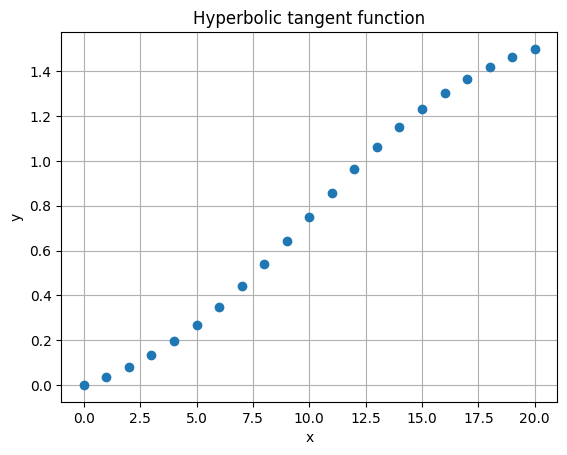

In [7]:
def RG( stretch, L, N):
    grid = np.zeros(N+1)
    tanGamma = np.tanh(stretch)

    for i in range(0, N+1):
        epsilon = 1 - 2*(i)/(N)
        grid[i] = (1 - np.tanh(stretch*epsilon)/tanGamma)*0.5*L

    return grid

grid = RG(1.2, 1.5, 20)

plt.plot(grid, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Hyperbolic tangent function')
plt.grid()

1. Se crea la clase con nombre **Domain**. La primera función suele ser el constructor, y se define con el nombre **_ _init_ _**. Este método está encargado de hacer el enmallado del dominio.

1. El método **pressure** se encarga de refinar el valor de la presión para que se cumpla la ecuación de continuidad. Se hace 50 iteraciones para refinar dicho valor.

1. El método **constantes** sirve para calcular los coeficientes que acompañan las derivadas. Esto se hizo para hacer legible las ecuaciones.

1. El método **VelPres** calcula los términos que contienen las derivadas de la componente de la velocidad dentro de la ecuación de Poisson.

1. El método **velocity** calcula las componentes de la velocidad en el tiempo futuro:
    1. Primero se calcula algunas constantes, como el número de Reynolds, y se inicializan las matrices donde se almacenarán los valores de las componentes de la velocidad y de la presión.
    1. Luego se llama al método **VelPres**
    1. Enseguida se llama al método **pressure**
    1. Este ciclo se repite dependiendo del tiempo total de simulación y el paso de tiempo.
1. El método **streams** interpola los valores $u$ y $v$ de la velocidad en una malla uniforme. Esto se debe hacer, ya que la función **streamplot** sólo grafica en malla uniforme.

1. El método **plotter** es un graficador predeterminado del código. Se encarga de graficar el contorno de la presión y las líneas de corriente en una misma figura.

In [10]:
class domain:    

    #El constructor se encarga de hacer el preprocesamiento
    def __init__(self, Lx, Ly, streX, streY, Nx, Ny):       
        self.Nx = Nx                                        #Número de puntos desde 0 hasta Nx
        self.x = self.RG(streX, Lx, Nx)                     #Llama al enmallador 
        self.Lx = Lx

        self.Ny = Ny                                        #Número de puntos desde 0 hasta Ny
        self.y = self.RG(streY, Ly, Ny)                     #Llama al enmallador 
        self.Ly = Ly


        self.X, self.Y = np.meshgrid(self.x, self.y)

        fig = plt.figure()                                           #Creo una ventana
        ax = fig.add_subplot(111)                                    #A la ventana le añado un plano en 2d

        for i in range(0,self.Nx+1):
            ax.plot(self.X[:,i], self.Y[:,0], color='k')

        for i in range(0,self.Nx+1):
            ax.plot(self.X[0,:], self.Y[i,:], color='k')

        #ax.plot(self.X, self.Y, color = 'k', ls='None', marker='.')  #Dentro del plano creado grafico 
        plt.xlim([0, Lx])
        plt.ylim([0, Ly])
        plt.title('Grid of the domain')
        plt.xlabel('$x$')
        plt.ylabel('$y$')
        plt.show

        
    #Con esa función defino las coordenadas para hacer un enmallado no uniforme
    def RG(self, stretch, L, N):
        grid = np.zeros(N+1)
        tanGamma = np.tanh(stretch)

        for i in range(0, N+1):
            epsilon = 1 - 2*(i)/(N)
            grid[i] = (1 - np.tanh(stretch*epsilon)/tanGamma)*0.5*L
        return grid

    #En esa función se busca la convergencia de PPE
    def pressure(self, P2, Vel):
        deltaX1 = (self.x[1:-1]-self.x[:-2])
        deltaX2 = (self.x[2:]-self.x[1:-1])
        deltaY1 = (self.y[1:-1]-self.y[:-2])
        deltaY2 = (self.y[2:]-self.y[1:-1])

        for n in range(50):
            P1 = P2.copy()
            P2 [1:-1,1:-1] = ((0.5*(deltaY1**2 + deltaY2**2))*(P1[1:-1, 2:]+P1[1:-1,:-2]) + 
                            (0.5*(deltaX1**2 + deltaX2**2))*(P1[2:,1:-1]+P1[:-2,1:-1])) \
                            /(2*(0.5*((deltaX1)**2 + (deltaX2)**2) + 0.5*((deltaY1)**2 + (deltaY2)**2))) + \
                            Vel[1:-1,1:-1]
            
            #Condiciones de frontera
            P2[:,0] = P2[:,1]   #dp/dx=0 en x=0
            P2[:,-1] = P2[:,-2] #dp/dx=0 en x=Lx
            P2[0,:] = P2[1,:]   #dp/dy=0 en y=0
            P2[-1,:] = 0        #p=0 y=Ly - Presión atmosférica en la superficie

        return P2
    

    def constantes(self, eta, rho):
        #Definición de todas las constantes
        deltaX1 = (self.x[1:-1]-self.x[:-2])
        deltaX2 = (self.x[2:]-self.x[1:-1])
        deltaY1 = (self.y[1:-1]-self.y[:-2])
        deltaY2 = (self.y[2:]-self.y[1:-1])

        alfa = eta*self.dt/(0.5*(deltaX1**2 + deltaX2**2))
        beta = eta*self.dt/(0.5*(deltaY1**2 + deltaY2**2))
        C = self.dt/(rho*(deltaX1 + deltaX2))
        D = self.dt/(rho*(deltaY1 + deltaY2))
        E = self.dt/(deltaX1)
        F = self.dt/(deltaY1)
        R = -rho*0.5**2*((deltaX1**2 + deltaX2**2)*(deltaY1**2 + deltaY2**2)) \
            /((deltaX1**2 + deltaX2**2) + (deltaY1**2 + deltaY2**2))

        return alfa, beta, C, D, E, F, R 
    
    def VelPres(self, u2, v2, R, Vel):
        deltaX1 = (self.x[1:-1]-self.x[:-2])
        deltaX2 = (self.x[2:]-self.x[1:-1])
        deltaY1 = (self.y[1:-1]-self.y[:-2])
        deltaY2 = (self.y[2:]-self.y[1:-1])

        Vel[1:-1,1:-1] = R*(1/self.dt*((u2[1:-1,2:]-u2[1:-1,:-2])/(deltaX1 + deltaX2) + 
                                       (v2[2:, 1:-1]-v2[:-2,1:-1])/(deltaY1 + deltaY2)) -
                            ((u2[1:-1,2:]-u2[1:-1,:-2])/(deltaX1 + deltaX2))**2 - 
                            2*(u2[2:,1:-1]-u2[:-2,1:-1])/(deltaY1 + deltaY2)*(v2[1:-1,2:]-v2[1:-1,:-2])/(deltaX1 + deltaX2) -
                            ((v2[2:, 1:-1]-v2[:-2,1:-1])/(deltaY1 + deltaY2))**2)
        return Vel

    def velocity(self, T, dt, eta, rho, lidVel):
        self.Re = lidVel*self.Ly/eta                  
        self.Nt = int(T/dt)                            #Número de puntos desde 0 hasta Nt
        self.t = np.linspace(0, T, self.Nt+1)          #0 hasta T con Nt+1 divisiones
        self.dt = self.t[1]-self.t[0]                  #Chequeo del dt, para que coincida

        #Initial conditions: U, V, P = 0 at time t=0
        u2 = np.zeros((self.Nx+1, self.Ny+1))
        v2 = np.zeros((self.Nx+1, self.Ny+1))
        P2  = np.zeros((self.Nx+1, self.Ny+1))
        Vel = np.zeros((self.Nx+1, self.Ny+1))

        #Constante para definir todas las variables
        alfa, beta, C, D, E, F, R = self.constantes(eta, rho)

        for n in range(1, self.Nt):
            u1 = u2.copy()
            v1 = v2.copy()

            #Uso el corrector de la ecuación de continuidad
            Vel = self.VelPres(u2, v2, R, Vel)
            P2 = self.pressure(P2, Vel)

            u2[1:-1,1:-1] = u1[1:-1,1:-1] -\
                            E*u1[1:-1,1:-1]*(u1[1:-1,1:-1] - u1[1:-1,:-2]) - \
                            F*v1[1:-1,1:-1]*(u1[1:-1,1:-1]-u1[:-2,1:-1]) - \
                            C*(P2[1:-1, 2:]-P2[1:-1,:-2]) +\
                            alfa*(u1[1:-1,2:] - 2*u1[1:-1,1:-1] + u1[1:-1,:-2]) +\
                            beta*(u1[2:,1:-1] - 2*u1[1:-1,1:-1] + u1[:-2,1:-1])
            
            v2[1:-1,1:-1] = v1[1:-1,1:-1] -\
                            E*u1[1:-1,1:-1]*(v1[1:-1,1:-1] - v1[1:-1,:-2]) - \
                            F*v1[1:-1,1:-1]*(v1[1:-1,1:-1]-v1[:-2,1:-1]) - \
                            D*(P2[2:,1:-1]-P2[:-2,1:-1]) +\
                            alfa*(v1[1:-1,2:] - 2*v1[1:-1,1:-1] + v1[1:-1,:-2]) +\
                            beta*(v1[2:,1:-1] - 2*v1[1:-1,1:-1] + v1[:-2,1:-1])
            
            #Entran en vigencia las condiciones de frontera para la velocidad
            u2[:,0] = 0 #Condición de no deslizamientos
            v2[:,0] = 0
            u2[:,-1] = 0
            v2[:,-1] = 0
            u2[-1,:] = lidVel #La tapa que se mueve
            v2[-1,:] = 0
            u2[0,:] = 0   
            v2[0,:] = 0

        #Luego de solucionar el caso, hago que las matrices sean atributos de la clase 
        self.u2 = u2
        self.v2 = v2
        self.P2 = P2

        np.savetxt('U_Re{:.0f}.txt'.format(self.Re), self.u2)
        np.savetxt('V_Re{:.0f}.txt'.format(self.Re), self.v2)
        np.savetxt('P_Re{:.0f}.txt'.format(self.Re), self.P2)
        np.savetxt('X{:.0f}.txt'.format(self.Re), self.X)
        np.savetxt('Y{:.0f}.txt'.format(self.Re), self.Y)

    def streams(self):
        Unix = np.linspace(self.x.min(), self.x.max(), 30)
        Uniy = np.linspace(self.y.min(), self.y.max(), 30)

        xi, yi = np.meshgrid(Unix,Uniy)

        #then, interpolate your data onto this grid:
        Flatx = self.X.flatten()
        Flaty = self.Y.flatten()
        Flatu = self.u2.flatten()
        Flatv = self.v2.flatten()
        
        Interu2 = griddata((Flatx, Flaty), Flatu, (xi,yi), method='linear')
        Interv2 = griddata((Flatx, Flaty), Flatv, (xi,yi), method='linear')

        return Unix, Uniy, Interu2, Interv2

    def plotter(self):
        
        Unix, Uniy, Interu2, Interv2 = self.streams()
        
        fig = plt.figure()
        plt.contourf(self.X, self.Y, self.P2, cmap = 'turbo')
        plt.colorbar()
        Contorno = plt.contour(self.X, self.Y, self.P2, colors='black', linestyles='dashed')  
        plt.clabel(Contorno, inline = 1, fontsize=8)

        plt.streamplot(Unix, Uniy, Interu2, Interv2, density = 0.4, color = 'black')
        plt.title('$Simulation~at~t={:.3f}~s~and~Re={:.1f}$'.format(self.t[-1], self.Re))
        plt.xlabel('$x[m]$')
        plt.ylabel('$y[m]$')
        plt.xlim([0, self.Lx])
        plt.ylim([0, self.Ly])

<p style='text-align: justify;'> A continuación se define las constantes de la simulación. $L_x$ y $L:y$ son el ancho y el alto del dominio. $streX$ y $streY$ representan el coeficiente de estiramiento de la malla en $X$ y en $Y$, respectivamente. $N_x$ y $N_y$ son el número de nodos en dirección $X$ y en $Y$, respectivamente. Con la última línea se crea el objeto con el nombre de $cavity$. Al crear el objeto, el programa devuelve el dominio y su respectiva malla.</p>

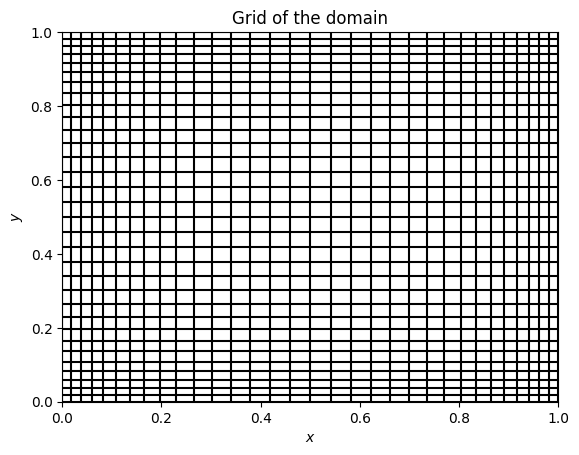

In [11]:
#Hyperbolic tangent type clustering
Lx = 1
Ly = 1
streX = 1.0
streY = 1.0
Nx = 32
Ny = 32
cavity = domain(Lx, Ly, streX, streY, Nx, Ny)

<p style='text-align: justify;'> A contiuación se establecen el tiempo de simulación, el paso de tiempo, las propiedades del fluido (densidad, viscosidad dinámica y cinemática) y la velocidad de la tapa. Con la línea $cavity.velocity(T, dt, eta, rho, lidVel)$ se está llamando al método $velocity$. Con la línea $cavity.plotter()$ se llama al método $plotter$ </p>

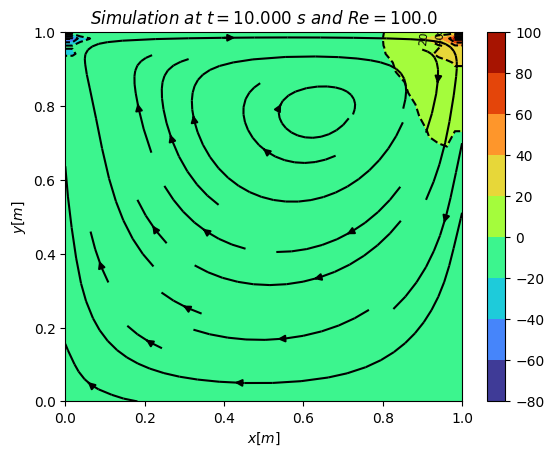

In [13]:
T = 10.0
dt = 0.0001
rho = 1
nu = 0.1
eta = (nu/rho)
lidVel = 10
cavity.velocity(T, dt, eta, rho, lidVel)
cavity.plotter()

<p style='text-align: justify;'> En esta celda se escribe código para el posproceso. Primero se define una función llamada $postPro$ que se encarga de interpolar en valores en puntos de interés. Esto permite comprar resultados con artículos de manera directa. En este caso, se tomaron los valores de $u$ en una línea vertical en $x=0.5$, y de $v$ en una línea horizontal en $y = 0.5$ para comparar con el <b>DNS</b> realizado por <b>Ghia</b> </p>

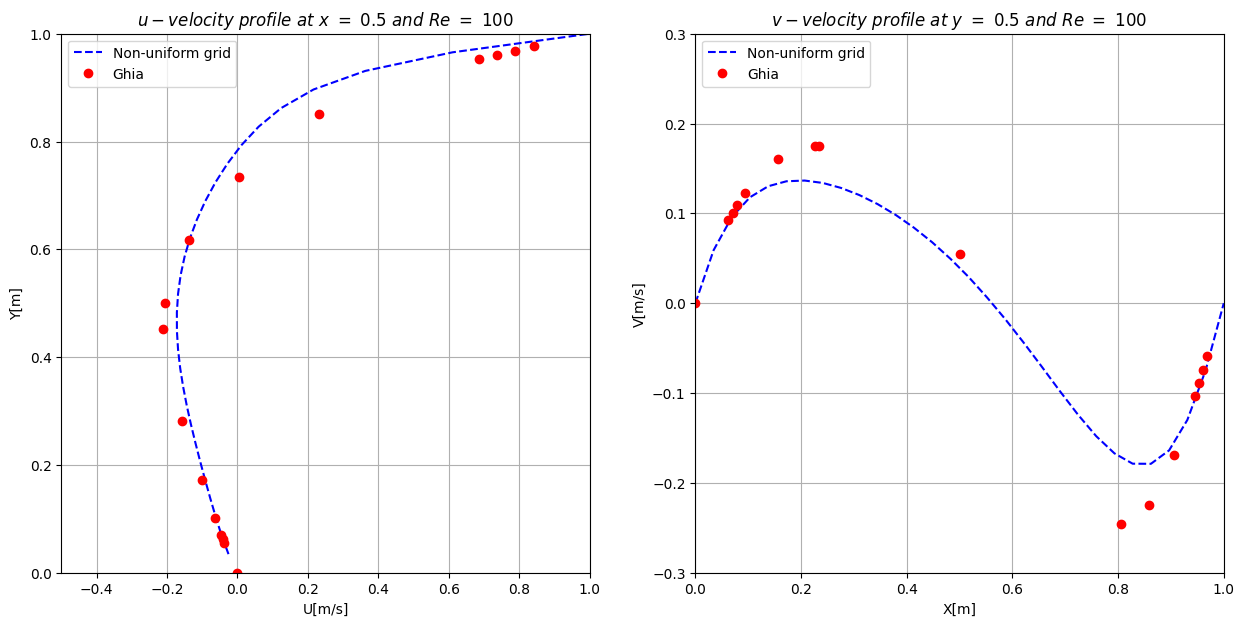

In [14]:
#Función para hacer postproceso
def postPro(X, Y, Vel, vectorX, vectorY):

    #Convierto la malla en un vector, para poder interpolar
    flatX = X.flatten()
    flatY = Y.flatten()
    flatVel = Vel.flatten()

    InterVel = griddata((flatX, flatY), flatVel, (vectorX,vectorY), method='cubic')

    return InterVel

#Importamo los archivos almacenados
filename01 = 'P_Re100.txt'
filename02 = 'U_Re100.txt'
filename03 = 'V_Re100.txt'
filename04 = 'X100.txt'
filename05 = 'Y100.txt'
filename06 = 'perfilU_Re100.txt'
filename07 = 'perfilV_Re100.txt'

#Se almacenan en matrices
pressureField = np.loadtxt(filename01, delimiter=' ', skiprows=1, dtype=float)
uField = np.loadtxt(filename02, delimiter=' ', skiprows=1, dtype=float)
vField = np.loadtxt(filename03, delimiter=' ', skiprows=1, dtype=float)
X = np.loadtxt(filename04, delimiter=' ', skiprows=1, dtype=float)
Y = np.loadtxt(filename05, delimiter=' ', skiprows=1, dtype=float)
ghiaU = np.loadtxt(filename06, delimiter=' ', skiprows=1, dtype=float)
ghiaV = np.loadtxt(filename07, delimiter=' ', skiprows=1, dtype=float)

#Quiero conocer el perfil de velocidad en el centro
vectorX = np.ones(30)*0.5
vectorY = np.linspace(0, Ly, 30)
InterU= postPro(X, Y, uField, vectorX, vectorY)

InterV= postPro(X, Y, vField, vectorY, vectorX)

normU = InterU/lidVel
normV = InterV/lidVel 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))

ax1.plot(normU, vectorY, '--b', label ='Non-uniform grid')
ax1.plot(ghiaU[:,1], ghiaU[:,0], 'or', label = 'Ghia')
ax1.set_xlim([-0.5, 1])
ax1.set_ylim([0, Ly])
ax1.grid()
ax1.set_xlabel('U[m/s]')
ax1.set_ylabel('Y[m]')
ax1.set_title('$u-velocity~profile~at~x~=~0.5~and~Re~=~100$')
ax1.legend(loc ="upper left")

ax2.plot(vectorY, normV, '--b', label ='Non-uniform grid')
ax2.plot(ghiaV[:,0], ghiaV[:,1], 'or', label = 'Ghia')
ax2.set_xlim([0, Lx])
ax2.set_ylim([-0.3, 0.3])
ax2.grid()
ax2.set_xlabel('X[m]')
ax2.set_ylabel('V[m/s]')
ax2.set_title('$v-velocity~profile~at~y~=~0.5~and~Re~=~100$')
ax2.legend(loc ="upper left")